## Step 7: Create bar charts to compare treatments

Creating comparison bar charts...


/var/folders/6y/1qbtc2814zd66fl_btj1dcp40000gr/T/ipykernel_29076/1404750474.py:59: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/terooatt0/miniconda3/envs/bio559r/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


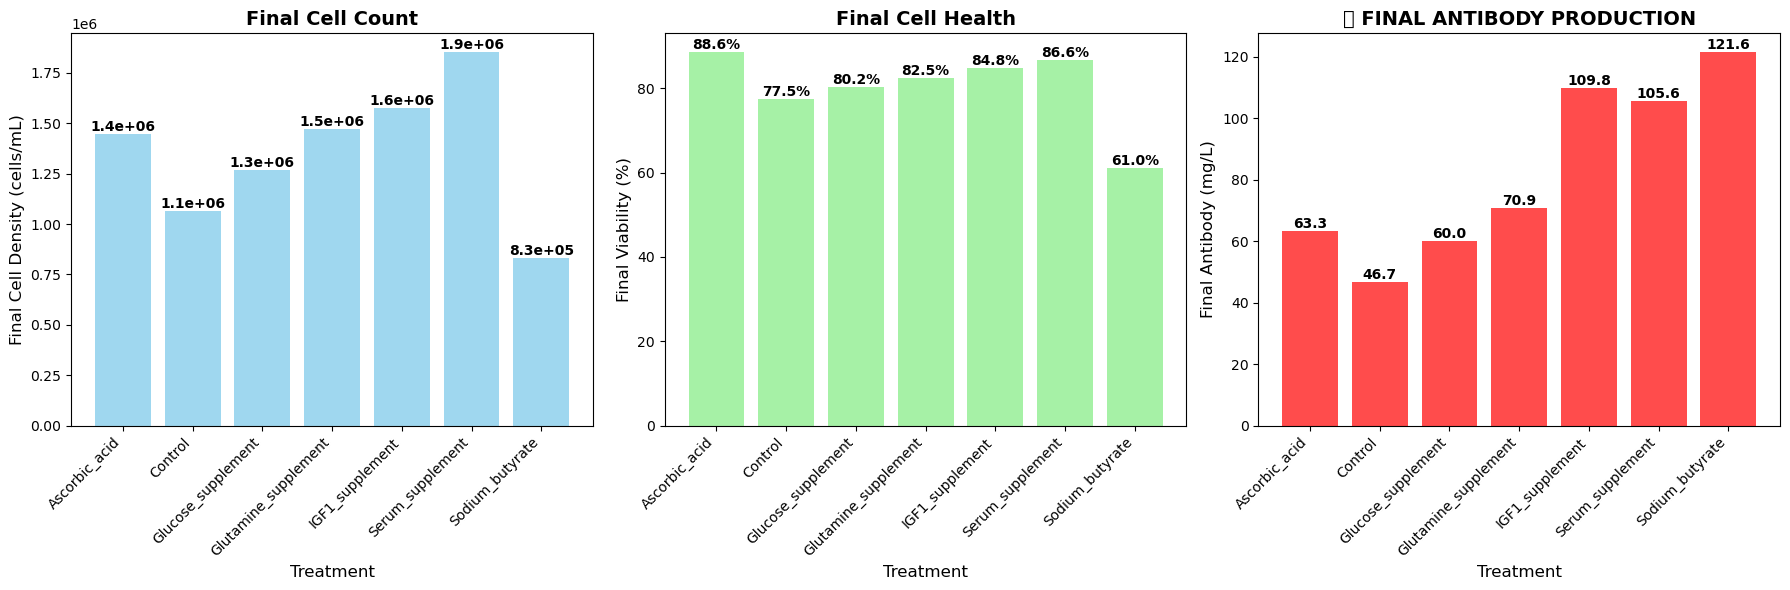

✓ Bar charts created! Which treatment has the tallest red bar?


In [100]:

print("Creating comparison bar charts...")

# Set up figure with 3 bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chart 1: Final cell density
ax1 = axes[0]
cell_density_avg = data.groupby('Treatment')['Cell_density_per_mL'].mean()
bars1 = ax1.bar(range(len(cell_density_avg)), cell_density_avg.values, 
                color='skyblue', alpha=0.8)
ax1.set_xlabel('Treatment', fontsize=12)
ax1.set_ylabel('Final Cell Density (cells/mL)', fontsize=12)
ax1.set_title('Final Cell Count', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(cell_density_avg)))
ax1.set_xticklabels(cell_density_avg.index, rotation=45, ha='right')

# Add numbers on top of bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1e}', ha='center', va='bottom', fontweight='bold')

# Chart 2: Final viability
ax2 = axes[1]
viability_avg = data.groupby('Treatment')['Viability_percent'].mean()
bars2 = ax2.bar(range(len(viability_avg)), viability_avg.values, 
                color='lightgreen', alpha=0.8)
ax2.set_xlabel('Treatment', fontsize=12)
ax2.set_ylabel('Final Viability (%)', fontsize=12)
ax2.set_title('Final Cell Health', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(viability_avg)))
ax2.set_xticklabels(viability_avg.index, rotation=45, ha='right')

# Add numbers on top of bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Chart 3: Final antibody production (MOST IMPORTANT!)
ax3 = axes[2]
antibody_avg = data.groupby('Treatment')['Antibody_mg_per_L'].mean()
bars3 = ax3.bar(range(len(antibody_avg)), antibody_avg.values, 
                color='red', alpha=0.7)
ax3.set_xlabel('Treatment', fontsize=12)
ax3.set_ylabel('Final Antibody (mg/L)', fontsize=12)
ax3.set_title('🎯 FINAL ANTIBODY PRODUCTION', fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(antibody_avg)))
ax3.set_xticklabels(antibody_avg.index, rotation=45, ha='right')

# Add numbers on top of bars
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Bar charts created! Which treatment has the tallest red bar?")

/var/folders/6y/1qbtc2814zd66fl_btj1dcp40000gr/T/ipykernel_29076/1088163937.py:31: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/terooatt0/miniconda3/envs/bio559r/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


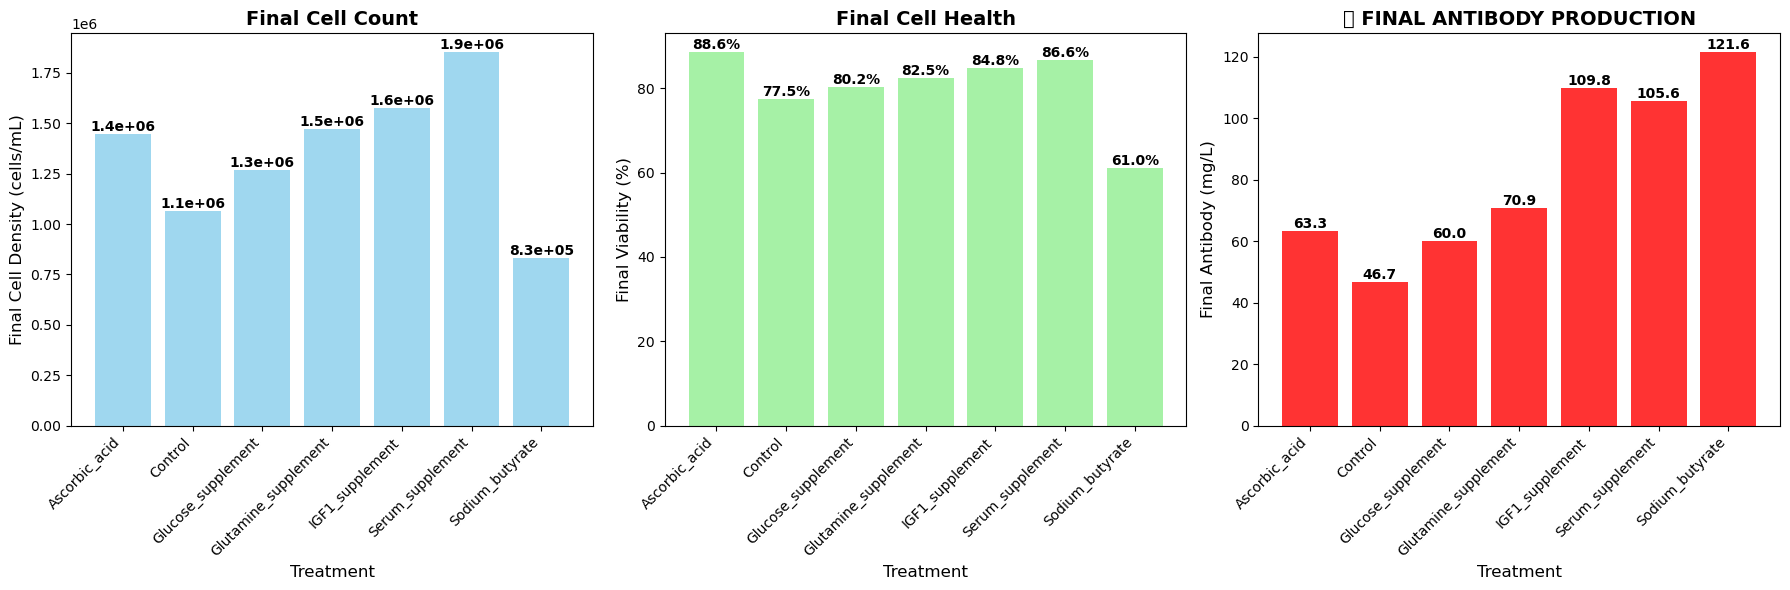

In [101]:
import matplotlib.pyplot as plt

# Define helper function
def plot_bar(ax, df, y_col, ylabel, title, color, fmt, rotation=45):
    means = df.groupby('Treatment')[y_col].mean()
    bars = ax.bar(range(len(means)), means.values, color=color, alpha=0.8)
    ax.set_xlabel('Treatment', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(means)))
    ax.set_xticklabels(means.index, rotation=rotation, ha='right')
    # Annotate bars
    for bar, val in zip(bars, means.values):
        ax.text(bar.get_x() + bar.get_width()/2., val,
                fmt.format(val), ha='center', va='bottom', fontweight='bold')

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Call helper for each chart
plot_bar(axes[0], data, 'Cell_density_per_mL',
         'Final Cell Density (cells/mL)', 'Final Cell Count',
         'skyblue', '{:.1e}')
plot_bar(axes[1], data, 'Viability_percent',
         'Final Viability (%)', 'Final Cell Health',
         'lightgreen', '{:.1f}%')
plot_bar(axes[2], data, 'Antibody_mg_per_L',
         'Final Antibody (mg/L)', '🎯 FINAL ANTIBODY PRODUCTION',
         'red', '{:.1f}')

plt.tight_layout()
plt.show()


/var/folders/6y/1qbtc2814zd66fl_btj1dcp40000gr/T/ipykernel_2319/4256340975.py:36: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/terooatt0/miniconda3/envs/bio559r/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


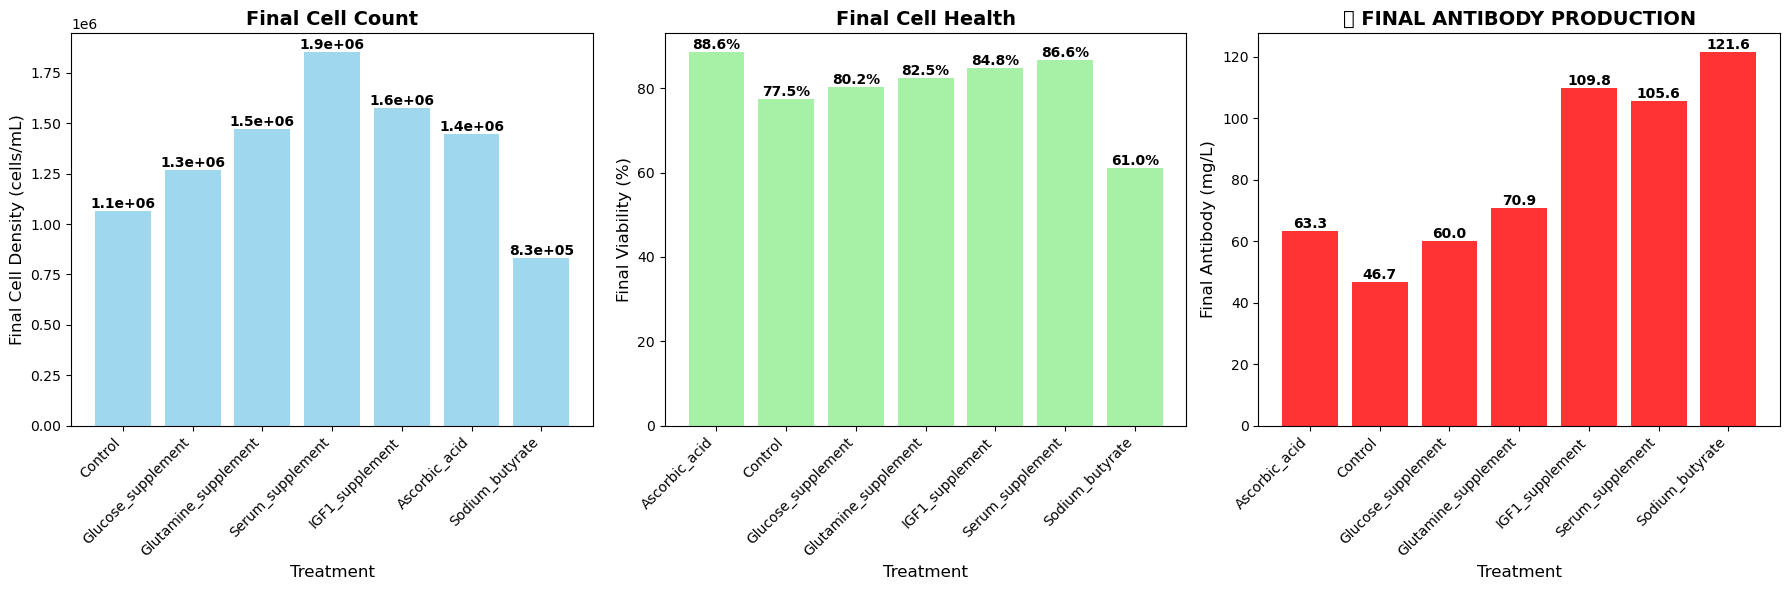

In [29]:
## Re-order the x axis

# Define helper function
def plot_bar(ax, df, y_col, ylabel, title, color, fmt, rotation=45, order=None):
    means = df.groupby('Treatment')[y_col].mean()
    
    # Reorder if custom order is given
    if order:
        means = means.reindex(order)
        
    bars = ax.bar(range(len(means)), means.values, color=color, alpha=0.8)
    ax.set_xlabel('Treatment', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(means)))
    ax.set_xticklabels(means.index, rotation=rotation, ha='right')
    # Annotate bars
    for bar, val in zip(bars, means.values):
        ax.text(bar.get_x() + bar.get_width()/2., val,
                fmt.format(val), ha='center', va='bottom', fontweight='bold')

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Call helper for each chart
plot_bar(axes[0], data, 'Cell_density_per_mL',
         'Final Cell Density (cells/mL)', 'Final Cell Count',
         'skyblue', '{:.1e}')
plot_bar(axes[1], data, 'Viability_percent',
         'Final Viability (%)', 'Final Cell Health',
         'lightgreen', '{:.1f}%')
plot_bar(axes[2], data, 'Antibody_mg_per_L',
         'Final Antibody (mg/L)', '🎯 FINAL ANTIBODY PRODUCTION',
         'red', '{:.1f}')

plt.tight_layout()
plt.show()


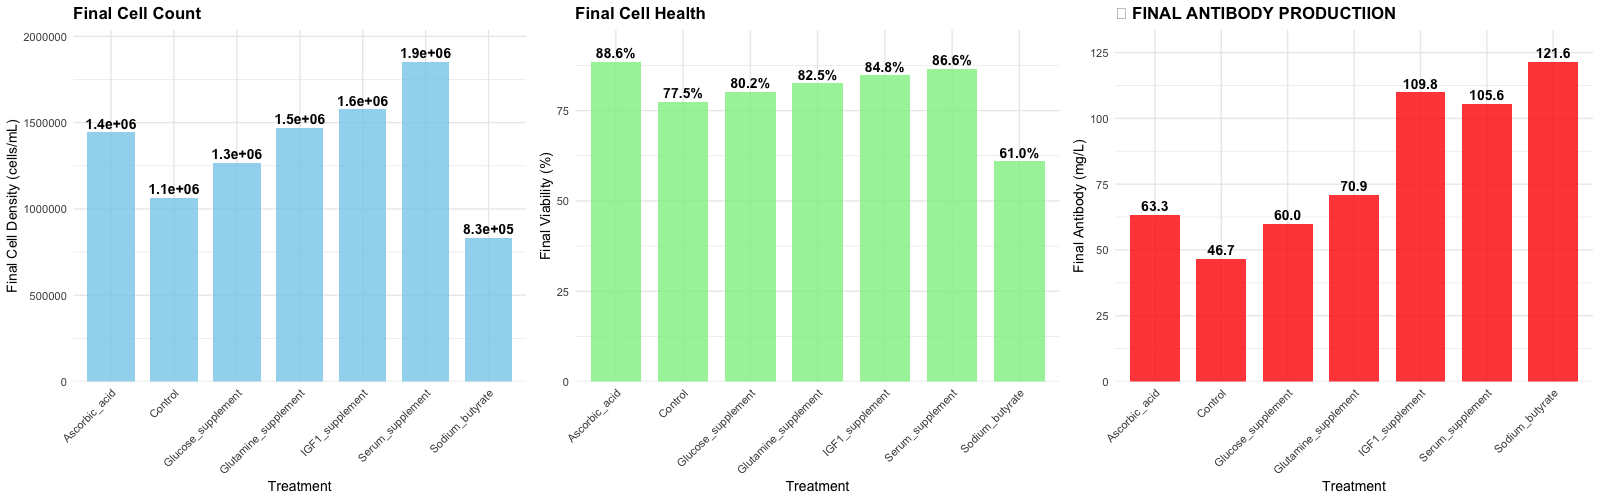

In [103]:
%%R -i data -w 1600 -h 500 -u px

library(dplyr)
library(ggplot2)
library(gridExtra)

# 1) Compute treatment means (like pandas groupby().mean())
df_means <- data %>%
  group_by(Treatment) %>%
  summarise(
    Cell_density_per_mL = mean(Cell_density_per_mL, na.rm = TRUE),
    Viability_percent   = mean(Viability_percent,   na.rm = TRUE),
    Antibody_mg_per_L   = mean(Antibody_mg_per_L,   na.rm = TRUE),
    .groups = "drop"
  )

# 2) Helper to build one annotated bar chart
plot_bar <- function(data, y_col, ylabel, title, fill_color, fmt) {
  ggplot(data, aes(x = Treatment, y = .data[[y_col]])) +
    geom_col(fill = fill_color, alpha = 0.8, width = 0.75, show.legend = FALSE) +
    geom_text(aes(label = sprintf(fmt, .data[[y_col]])),
              vjust = -0.4, fontface = "bold") +
    labs(x = "Treatment", y = ylabel, title = title) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.10))) +  # headroom for labels
    theme_minimal(base_size = 14) +
    theme(
      axis.text.x  = element_text(angle = 45, hjust = 1),
      plot.title   = element_text(face = "bold")
    )
}

# 3) Build the three panels (colors & formats match your Python)
p1 <- plot_bar(df_means, "Cell_density_per_mL",
               "Final Cell Density (cells/mL)", "Final Cell Count",
               "skyblue", "%.1e")

p2 <- plot_bar(df_means, "Viability_percent",
               "Final Viability (%)", "Final Cell Health",
               "lightgreen", "%.1f%%")

p3 <- plot_bar(df_means, "Antibody_mg_per_L",
               "Final Antibody (mg/L)", "🎯 FINAL ANTIBODY PRODUCTION",
               "red", "%.1f")

# 4) Arrange like 1×3 subplots
grid.arrange(p1, p2, p3, ncol = 3)